In [1]:
# install modules 
!pip install xarray
!pip install copernicusmarine
!pip install panel
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 26.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.5 MB/s eta 0:00:00


In [25]:
from IPython.display import IFrame
%matplotlib inline
import matplotlib.pyplot as plt
import getpass
import xarray as xr
import panel.widgets as pnw
import panel as pn
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import copernicusmarine
from datetime import datetime

# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
?copernicusmarine.open_dataset

Signature:
copernicusmarine.open_dataset(
    dataset_url: Optional[str] = None,
    dataset_id: Optional[str] = None,
    dataset_version: Optional[str] = None,
    dataset_part: Optional[str] = None,
    username: Optional[str] = None,
    password: Optional[str] = None,
    variables: Optional[List[str]] = None,
    minimum_longitude: Optional[float] = None,
    maximum_longitude: Optional[float] = None,
    minimum_latitude: Optional[float] = None,
    maximum_latitude: Optional[float] = None,
    minimum_depth: Optional[float] = None,
    maximum_depth: Optional[float] = None,
    vertical_dimension_as_originally_produced: bool = True,
    start_datetime: Union[datetime.datetime, str, NoneType] = None,
    end_datetime: Union[datetime.datetime, str, NoneType] = None,
    subset_method: Literal['nearest', 'strict'] = 'nearest',
    service: Optional[str] = None,
    credentials_file: Union[pathlib.Path, str, NoneType] = None,
    overwrite_metadata_cache: bool = False,
    no_metad

In [17]:
datasetID = "SST_MED_SST_L3S_NRT_OBSERVATIONS_010_012_a"

In [18]:
DS = copernicusmarine.open_dataset(dataset_id = datasetID)
DS

INFO - 2024-09-14T12:15:14Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-09-14T12:15:14Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-09-14T12:15:15Z - Service was not specified, the default one was selected: "arco-geo-series"


username:

  sh-2bb7d2c1-5418-425b-8c95-fabed6374943


password:

  ········


<xarray.Dataset> Size: 177GB
Dimensions:                              (time: 6102, latitude: 253,
                                          longitude: 871)
Coordinates:
  * latitude                             (latitude) float32 1kB 30.25 ... 46.0
  * longitude                            (longitude) float32 3kB -18.12 ... 3...
  * time                                 (time) datetime64[ns] 49kB 2008-01-0...
Data variables: (12/17)
    adjusted_sea_surface_temperature     (time, latitude, longitude) float64 11GB ...
    adjusted_standard_deviation_error    (time, latitude, longitude) float64 11GB ...
    bias_to_reference_sst                (time, latitude, longitude) float64 11GB ...
    l2p_flags                            (time, latitude, longitude) float64 11GB ...
    or_latitude                          (time, latitude, longitude) float64 11GB ...
    or_longitude                         (time, latitude, longitude) float64 11GB ...
    ...                                   ...
    sses_standard_deviation              (time, latitude, longitude) float64 11GB ...
    sst_dtime                            (time, latitude, longitude) float64 11GB ...
    standard_deviation_to_reference_sst  (time, latitude, longitude) float64 11GB ...
    sum_square_sst                       (time, latitude, longitude) float64 11GB ...
    sum_sst                              (time, latitude, longitude) float64 11GB ...
    wind_speed                           (time, latitude, longitude) float64 11GB ...
Attributes: (12/53)
    Citation:                   ---
    Conventions:                CF-1.4
    DSD_entry_id:               -GOS-L3S_GHRSST-SSTsubskin
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    Scaling_Equation:           (scale_factor*data) + add_offset
    acknowledgment:             Please acknowledge the use of these data with...
    ...                         ...
    summary:                    The MED CNR Sea Surface Temperature L3S produ...
    time_coverage_end:          20231031T070000Z
    time_coverage_start:        20231030T190000Z
    title:                      Mediterranean SST, L3S, 1/16deg daily (SST_ME...
    uuid:                       781c99b8-7e37-11ee-8d14-005056be6f27
    westernmost_longitude:      -18.125

In [19]:
DS.data_vars

Data variables:
    adjusted_sea_surface_temperature     (time, latitude, longitude) float64 11GB ...
    adjusted_standard_deviation_error    (time, latitude, longitude) float64 11GB ...
    bias_to_reference_sst                (time, latitude, longitude) float64 11GB ...
    l2p_flags                            (time, latitude, longitude) float64 11GB ...
    or_latitude                          (time, latitude, longitude) float64 11GB ...
    or_longitude                         (time, latitude, longitude) float64 11GB ...
    or_number_of_pixels                  (time, latitude, longitude) float64 11GB ...
    quality_level                        (time, latitude, longitude) float32 5GB ...
    sea_surface_temperature              (time, latitude, longitude) float64 11GB ...
    sources_of_sst                       (time, latitude, longitude) float64 11GB ...
    sses_bias                            (time, latitude, longitude) float64 11GB ...
    sses_standard_deviation            

In [21]:
DS.sea_surface_temperature

<xarray.DataArray 'sea_surface_temperature' (time: 6102, latitude: 253,
                                             longitude: 871)> Size: 11GB
[1344655026 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float32 1kB 30.25 30.31 30.38 ... 45.88 45.94 46.0
  * longitude  (longitude) float32 3kB -18.12 -18.06 -18.0 ... 36.12 36.19 36.25
  * time       (time) datetime64[ns] 49kB 2008-01-01 2008-01-02 ... 2024-09-14
Attributes:
    comment:        SST measurement values from input L2 satellite data set.
    long_name:      sea surface temperature
    source:         EUR-L2P-ATS_NR_2P,UPA-L2P-ATS_NR_2P,JPL-L2P-MODIS_A,JPL-L...
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      4500
    valid_min:      -300

Select a Subset

In [26]:
# Obtén la fecha de hoy en formato de cadena de texto
hoy = datetime.today().strftime('%Y-%m-%d')

# Selecciona el rango de tiempo
subset = DS[['sea_surface_temperature']].sel(time=slice("2021-01-01", hoy))
subset

<xarray.Dataset> Size: 2GB
Dimensions:                  (time: 1353, latitude: 253, longitude: 871)
Coordinates:
  * latitude                 (latitude) float32 1kB 30.25 30.31 ... 45.94 46.0
  * longitude                (longitude) float32 3kB -18.12 -18.06 ... 36.25
  * time                     (time) datetime64[ns] 11kB 2021-01-01 ... 2024-0...
Data variables:
    sea_surface_temperature  (time, latitude, longitude) float64 2GB ...
Attributes: (12/53)
    Citation:                   ---
    Conventions:                CF-1.4
    DSD_entry_id:               -GOS-L3S_GHRSST-SSTsubskin
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    Scaling_Equation:           (scale_factor*data) + add_offset
    acknowledgment:             Please acknowledge the use of these data with...
    ...                         ...
    summary:                    The MED CNR Sea Surface Temperature L3S produ...
    time_coverage_end:          20231031T070000Z
    time_coverage_start:        20231030T190000Z
    title:                      Mediterranean SST, L3S, 1/16deg daily (SST_ME...
    uuid:                       781c99b8-7e37-11ee-8d14-005056be6f27
    westernmost_longitude:      -18.125

In [27]:
target_date = "2024-09"     # January 2021
subset_T = subset.sea_surface_temperature.sel(time = target_date, method = 'nearest')             # method='nearest' -> Method to use for inexact matches (use the nearest valid index value)
subset_T

<xarray.DataArray 'sea_surface_temperature' (latitude: 253, longitude: 871)> Size: 2MB
[220363 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float32 1kB 30.25 30.31 30.38 ... 45.88 45.94 46.0
  * longitude  (longitude) float32 3kB -18.12 -18.06 -18.0 ... 36.12 36.19 36.25
    time       datetime64[ns] 8B 2024-09-01
Attributes:
    comment:        SST measurement values from input L2 satellite data set.
    long_name:      sea surface temperature
    source:         EUR-L2P-ATS_NR_2P,UPA-L2P-ATS_NR_2P,JPL-L2P-MODIS_A,JPL-L...
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      4500
    valid_min:      -300

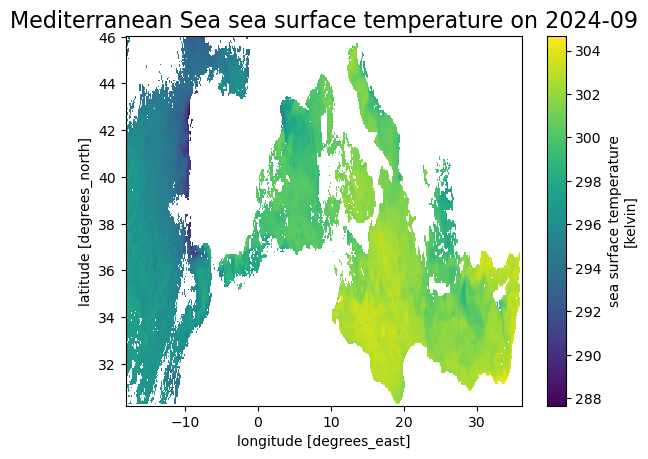

In [66]:
## Plot 
subset_T.plot()

## Add title
title = f'Mediterranean Sea {subset_T.long_name} on {str(target_date)}'       # set the title
plt.title(title, fontsize=16);

In [72]:
lon = slice(0, 6)     #longitude
lat = slice(40, 43)    #latitude
# 40.437948, 0.295898
# 42.440096, 5.529505

In [73]:
# Open the sea water temperature in the "new" subset
Slice = DS.sea_surface_temperature.sel(longitude = lon, latitude = lat).sel(time = target_date, method = 'nearest') 
Slice

<xarray.DataArray 'sea_surface_temperature' (latitude: 49, longitude: 97)> Size: 38kB
[4753 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float32 196B 40.0 40.06 40.12 ... 42.88 42.94 43.0
  * longitude  (longitude) float32 388B 0.0 0.0625 0.125 ... 5.875 5.938 6.0
    time       datetime64[ns] 8B 2024-09-01
Attributes:
    comment:        SST measurement values from input L2 satellite data set.
    long_name:      sea surface temperature
    source:         EUR-L2P-ATS_NR_2P,UPA-L2P-ATS_NR_2P,JPL-L2P-MODIS_A,JPL-L...
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      4500
    valid_min:      -300

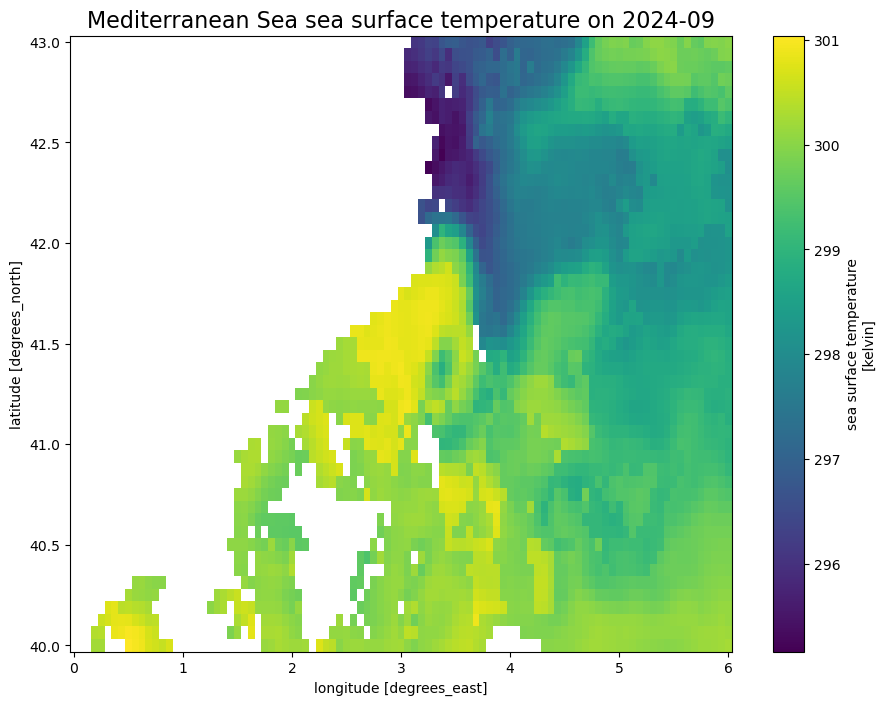

In [74]:
Slice.plot(size = 8)

## Add title
title = f'Mediterranean Sea {Slice.long_name} on {str(target_date)}'       # set the title
plt.title(title, fontsize=16);

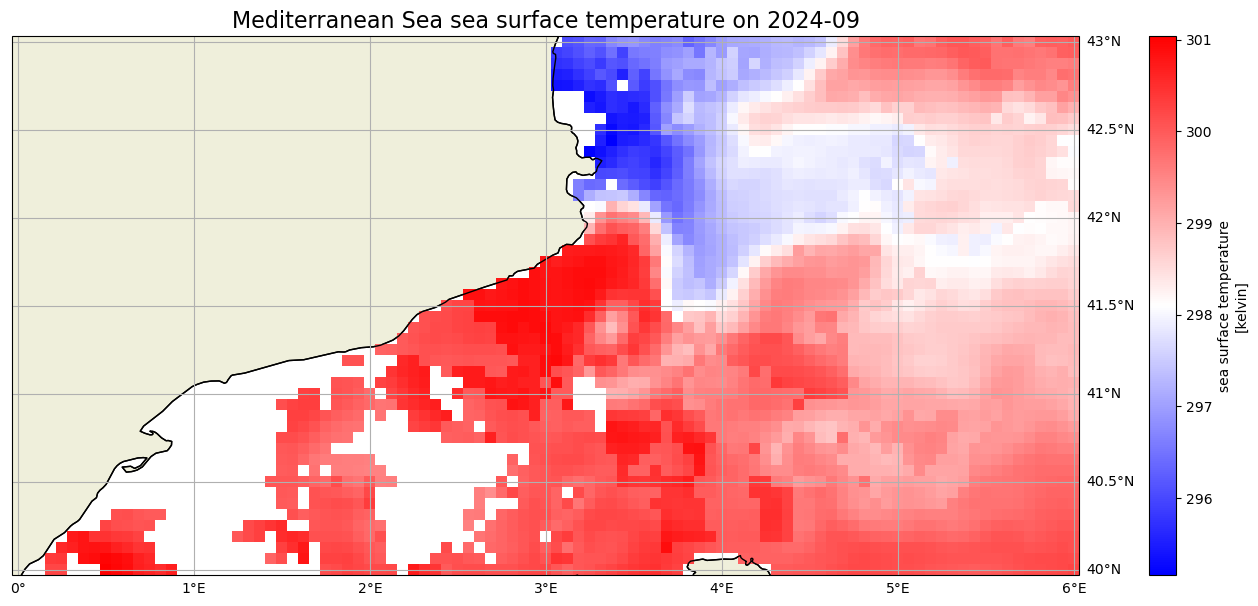

In [76]:
# Define el tamaño de la figura
f = plt.figure(figsize=(18, 7))

# Define la proyección
ax = plt.axes(projection=ccrs.PlateCarree())

# Añade las líneas de costa y el contorno de la tierra
ax.coastlines()
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')

# Añade las líneas de cuadrícula y desactiva las etiquetas de latitud en el lado izquierdo y las etiquetas de longitud en la parte superior
gl = ax.gridlines(draw_labels=True)
gl.left_labels = False
gl.top_labels = False

# Genera el gráfico con la barra de colores
Slice.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='bwr')

# Añade el título
title = f'Mediterranean Sea {Slice.long_name} on {str(target_date)}'
plt.title(title, fontsize=16)

# Muestra el gráfico
plt.show()